Travail developpe par le binome :
**Bruno OLIVEIRA, Samuel GHEZI**

Sur orientation de le Professeur **Martin GHIENNE**.

**Introduction**

L’exploitation d’un avion s’accompagne de conditions de vol très variables et difficiles à prédire, ce qui rend complexe l’estimation précise des chargements structuraux rencontrés en situation réelle. Bien que des informations telles que les déformations et les contraintes soient essentielles pour optimiser la maintenance et améliorer les modèles de dimensionnement, ces grandeurs ne sont généralement pas mesurées directement sur les aéronefs commerciaux. L’installation de capteurs dédiés entraînerait en effet une augmentation significative des coûts, de la masse, de la complexité d’intégration et des exigences de certification.

Le Mini-Challenge propose ainsi de développer un capteur virtuel basé sur des méthodes d’apprentissage automatique, capable d’estimer l’état de contrainte structurelle en différents points de l’avion à partir des seuls paramètres déjà enregistrés par l’instrumentation de bord. L’objectif est de prédire des grandeurs non mesurées physiquement, mais inférées à partir de variables de vol telles que l’attitude, les vitesses, les accélérations, les ordres de commande et les conditions de vent.

Pour cela, un ensemble de données réelles provenant de 44 vols d’essai est mis à disposition. Ce jeu de données comprend :

39 paramètres issus de l’instrumentation de bord, représentant l’état de vol, les efforts aérodynamiques et les actions de contrôle ;

15 jauges d’extensométrie (en micro-déformations, με) positionnées en différents points structuraux de l’appareil, permettant de mesurer directement les contraintes locales.

En résumé, ce projet vise à démontrer la capacité d’un modèle d’apprentissage supervisé à reproduire les contraintes structurelles réelles à partir de données opérationnelles courantes, ouvrant la voie à des stratégies de maintenance plus prédictives, moins coûteuses et mieux informées, dans la continuité des travaux précédents sur les capteurs virtuels pour le suivi de santé structurale.

Pour cette projet, on va se baser dans la teorie de Machine Learning, en se basent dans l'image ci dessous :

**Management des données**

Le liste de variable avec les description et sont format qui existe dans les données collectées pendant les vols sont en dessous :

In [1]:
# Importing Lybraries
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Management des données** - Acquisition des données

Displayng the dataframes

**Management des données** - Exploration des Données

Ploting grqphs for correlation

**Management des données** - Préparation des Données

In [2]:
df = pd.read_csv('df.csv')

In [3]:
df = df.drop(columns='Relative_Time')

In [4]:
df.head(10)

,Nz,Nx,Roll_Angle,Pitch_Angle,True_AOA,True_Sideslip,FPA,True_Heading,CAS,TAS,...,Strain7,Strain8,Strain9,Strain10,Strain11,Strain12,Strain13,Strain14,Strain15,Tol_ID
0,0.906212,-0.014912,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.823861,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TOL_1
1,0.906212,-0.014912,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.823861,0.0,0.0,...,-0.601572,-0.884219,-0.463841,0.161175,-0.000325,-0.143096,0.403351,0.006286,0.175358,TOL_1
2,0.906212,-0.014912,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.824664,0.0,0.0,...,-0.310433,-1.410038,-1.853289,0.646155,-0.000651,-0.571435,0.818918,0.012573,0.350715,TOL_1
3,0.906212,-0.014912,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.825466,0.0,0.0,...,0.424748,-1.414549,-1.854326,0.174219,-0.000976,-1.013577,1.216162,-1.045466,-0.521183,TOL_1
4,0.906212,-0.014912,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.825466,0.0,0.0,...,0.572497,-2.114138,2.512348,0.644700,0.579980,-0.572384,1.613406,0.691031,0.003260,TOL_1
5,0.906212,-0.020238,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.825466,0.0,0.0,...,1.025526,-1.238943,3.135614,0.486903,0.579654,-0.572858,1.613664,0.691860,0.004075,TOL_1
6,0.906212,-0.020238,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.825466,0.0,0.0,...,0.289817,-0.374608,1.565383,0.319440,0.579329,-0.577933,1.595600,0.004970,0.004890,TOL_1
7,0.906212,-0.020238,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.826069,0.0,0.0,...,0.879296,0.489727,-0.923224,0.166476,0.572297,-0.576107,-0.181416,-1.214082,-0.517923,TOL_1
8,0.906212,-0.020238,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.826269,0.0,0.0,...,-0.020616,-1.437107,-0.606083,0.013512,0.578679,-0.574281,0.820468,0.006627,0.006520,TOL_1
9,0.906212,-0.020238,0.147686,-0.311379,3.590025,-2.303673,146.080303,134.825868,0.0,0.0,...,0.434725,0.828243,-0.771030,0.319675,0.578353,-0.577056,0.613072,0.184843,0.181878,TOL_1


In [5]:
# Targets = deformações (saídas do modelo)
target_cols = [f"Strain{i}" for i in range(1, 16)]

# Features = todas as colunas menos Strains e Flight_ID
feature_cols = [c for c in df.columns if c not in target_cols + ["Tol_ID"]]

print("Features:", feature_cols)
print("Targets :", target_cols)

Features: ['Nz', 'Nx', 'Roll_Angle', 'Pitch_Angle', 'True_AOA', 'True_Sideslip', 'FPA', 'True_Heading', 'CAS', 'TAS', 'Mach', 'SAT', 'Baro_Alt', 'Roll_Rate', 'Pitch_Rate', 'Heading_Rate', 'Fuel_Qty1', 'Fuel_Qty2', 'L_Eng_Start', 'R_Eng_Start', 'L_Throttle_Pos', 'R_Throttle_Pos', 'L_Eng_N1', 'R_Eng_N1', 'L_Eng_N2', 'R_Eng_N2', 'L_Gear_Down', 'R_Gear_Down', 'N_Gear_Down', 'L_Flaperon_Pos', 'R_Flaperon_Pos', 'L_LEF_Pos', 'R_LEF_Pos', 'L_Rudder_Pos', 'L_Stab_Pos', 'R_Stab_Pos', 'Stick_Pitch', 'Stick_Roll', 'Pedal_Pos']
Targets : ['Strain1', 'Strain2', 'Strain3', 'Strain4', 'Strain5', 'Strain6', 'Strain7', 'Strain8', 'Strain9', 'Strain10', 'Strain11', 'Strain12', 'Strain13', 'Strain14', 'Strain15']


In [6]:
# Remove linhas com NaN nas colunas importantes
df_clean = df.dropna(subset=feature_cols + target_cols)

X = df_clean[feature_cols].values      # entradas
y = df_clean[target_cols].values      # saídas (strains)
Tol_ids = df_clean["Tol_ID"].values  # de qual TOL é cada linha

In [7]:

X_train, X_temp, y_train, y_temp, ids_train, ids_temp = train_test_split(
    X, y, Tol_ids,
    test_size=0.3,
    random_state=42,
    stratify=Tol_ids
)

X_val, X_test, y_val, y_test, ids_val, ids_test = train_test_split(
    X_temp, y_temp, ids_temp,
    test_size=0.5,
    random_state=42,
    stratify=ids_temp
)

In [8]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled   = scaler_X.transform(X_val)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled   = scaler_y.transform(y_val)
y_test_scaled  = scaler_y.transform(y_test)

In [9]:
class StrainDataset(Dataset):
    def __init__(self, X, y, seq_len):
        self.X = X
        self.y = y
        self.seq_len = seq_len

    def __len__(self):
        return len(self.X) - self.seq_len + 1

    def __getitem__(self, idx):
        x_seq = self.X[idx : idx + self.seq_len]
        y_seq = self.y[idx : idx + self.seq_len]
        return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)
sequence_len1 = 20
train_ds = StrainDataset(X_train_scaled, y_train_scaled, sequence_len1)
val_ds   = StrainDataset(X_val_scaled,   y_val_scaled, sequence_len1)
test_ds  = StrainDataset(X_test_scaled,  y_test_scaled, sequence_len1)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

Notre problème est dynamique car différentes variables dépendent du temps. Comme les variables sont nombreuses il serait aussi intéressant de réduire nos nombres de variables pour caractériser au mieux dans un minimum de variable notre problème. Ainsi, la solution choisit serait un `Multi-modèle` :
- En premier lieu, nous allons réduire nos variables en un espace latent z avec un `Encodeur` qui caractérise au mieux "spatialement" notre problème.
- Nous souhaitons aussi avoir des "fenêtres temporelles d'informations" afin de relier certaine grandeur physiques au temps. Ainsi, la seconde "couche" de notre modèle seront des couches `LSTM` qui relie nos informations au temps, et qui rend un tenseur avec les derniers état caché de chaque cellule.
- Finalement, nos informations passe par des dernières couches d'un `MLP` linéaire standard qui permettent la prédiction des contraintes appliquée à notre avion.

***Encoder layers***

In [10]:
class Encoder(nn.Module):#réduction de nos variable en un espace latent z qui caractérise au mieux nos données.
    def __init__(self, input_size, z_dim):
        super().__init__() #on appelle la classe parent Module
        self.hidden1 = nn.Linear(input_size, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.hidden3 = nn.Linear(32, z_dim)
        self.relu = nn.ReLU() #la fonction reLU a le gradiant le plus stable, elle semble donc être un bon choix pour notre projet.
    def forward (self, x): #passage du tenseur dans les différentes couches de notre Encoder
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        return x
        

***LSTM Layers***

In [11]:
class Lstm(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, nb_layers: int, dropout: float = 0.1):
        """
            on initialise notre système avec un dropout faible
        """

        super().__init__()
        self.input_size = input_size # récupère la taille des vecteurs des valeurs d'entrées
        self.hidden_size = hidden_size  # récupère le nombre de cellules par couche de lstm
        self.nb_layers = nb_layers  # récupère le nombre de couche dans le LSTM
        # Défini les couches LSTM
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=nb_layers, batch_first=True, dropout=dropout)

    def forward(self, x):
        # on fait passer l'entrée par les différente cellules du lstm
        output, (h_n, c_n) = self.lstm(x)
        return output
    

***MLP predictive layers***

In [12]:
class MLP(nn.Module):
    def __init__(self, input_size, n_contraintes):
        super().__init__()
        self.hidden1 = nn.Linear(input_size, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.hidden3 = nn.Linear(64, n_contraintes)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        return x
        

**Multi-modèle**

In [13]:
class Mercosur(nn.Module):
    def __init__(self, input_size, z_dim, hidden_size, nb_layers, n_contraintes):
        super().__init__()
        self.encoder_layers = Encoder(input_size, z_dim)
        self.lstm_layers = Lstm(z_dim, hidden_size, nb_layers)
        self.mlp_layers = MLP(hidden_size, n_contraintes)
    def forward(self, x):
        z_seq = self.encoder_layers(x)
        h_temp = self.lstm_layers(z_seq)
        y_pred = self.mlp_layers(h_temp)
        return y_pred

On instancie nos hyperparamètres qui pourront être optimisé par la suite

In [14]:
hidden_size1 = 64 # le réseau traite beaucoup d'informations et ce sur une séquence de temps qui multiplie les liens entre eux. il faut donc un nombre de cellule dans le lstm équivalent
#le nombre d'entrée du MLP qui servira 
n_features = X_train_scaled.shape[1]
n_outputs  = y_train_scaled.shape[1]
z_dim = 16
nb_layers_lstm = 3

In [15]:
print(n_outputs)

15


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
capteur_model = Mercosur(n_features, z_dim, hidden_size1, nb_layers_lstm, n_outputs).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(capteur_model.parameters(), lr=1e-3)

/à lancer

In [17]:
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in tqdm(loader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    return running_loss / len(loader.dataset)

def eval_epoch(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            running_loss += loss.item() * X_batch.size(0)

    return running_loss / len(loader.dataset)




In [18]:
print({next(iter(train_loader))[0].shape})

{torch.Size([256, 20, 39])}


In [19]:
n_epochs = 30
train_losses, val_losses = [], []
for epoch in range(n_epochs):
    train_loss = train_epoch(capteur_model, train_loader, optimizer, criterion)
    val_loss   = eval_epoch(capteur_model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1:03d} | Train loss: {train_loss:.6f} | Val loss: {val_loss:.6f}")

100%|██████████| 19303/19303 [03:14<00:00, 99.45it/s] 


Epoch 001 | Train loss: 0.190963 | Val loss: 0.139361


100%|██████████| 19303/19303 [03:09<00:00, 102.09it/s]


Epoch 002 | Train loss: 0.130396 | Val loss: 0.106653


100%|██████████| 19303/19303 [03:03<00:00, 105.23it/s]


Epoch 003 | Train loss: 0.113103 | Val loss: 0.093784


100%|██████████| 19303/19303 [02:59<00:00, 107.57it/s]


Epoch 004 | Train loss: 0.104230 | Val loss: 0.083711


100%|██████████| 19303/19303 [02:58<00:00, 107.97it/s]


Epoch 005 | Train loss: 0.099183 | Val loss: 0.079806


100%|██████████| 19303/19303 [03:27<00:00, 92.94it/s] 


Epoch 006 | Train loss: 0.095805 | Val loss: 0.075751


100%|██████████| 19303/19303 [03:17<00:00, 97.78it/s] 


Epoch 007 | Train loss: 0.093383 | Val loss: 0.072787


100%|██████████| 19303/19303 [03:40<00:00, 87.55it/s] 


Epoch 008 | Train loss: 0.091520 | Val loss: 0.071571


100%|██████████| 19303/19303 [03:03<00:00, 105.00it/s]


Epoch 009 | Train loss: 0.090060 | Val loss: 0.069761


100%|██████████| 19303/19303 [03:01<00:00, 106.20it/s]


Epoch 010 | Train loss: 0.088872 | Val loss: 0.068044


100%|██████████| 19303/19303 [03:03<00:00, 105.08it/s]


Epoch 011 | Train loss: 0.087811 | Val loss: 0.066664


100%|██████████| 19303/19303 [03:01<00:00, 106.60it/s]


Epoch 012 | Train loss: 0.086922 | Val loss: 0.066849


100%|██████████| 19303/19303 [03:00<00:00, 106.74it/s]


Epoch 013 | Train loss: 0.086131 | Val loss: 0.064997


100%|██████████| 19303/19303 [03:01<00:00, 106.33it/s]


Epoch 014 | Train loss: 0.085391 | Val loss: 0.063743


100%|██████████| 19303/19303 [02:58<00:00, 107.91it/s]


Epoch 015 | Train loss: 0.084820 | Val loss: 0.065517


100%|██████████| 19303/19303 [02:58<00:00, 108.17it/s]


Epoch 016 | Train loss: 0.084306 | Val loss: 0.063490


100%|██████████| 19303/19303 [03:00<00:00, 106.82it/s]


Epoch 017 | Train loss: 0.083786 | Val loss: 0.062562


100%|██████████| 19303/19303 [03:00<00:00, 107.19it/s]


Epoch 018 | Train loss: 0.083320 | Val loss: 0.061911


100%|██████████| 19303/19303 [03:00<00:00, 106.89it/s]


Epoch 019 | Train loss: 0.082914 | Val loss: 0.064516


100%|██████████| 19303/19303 [02:57<00:00, 108.57it/s]


Epoch 020 | Train loss: 0.082569 | Val loss: 0.064585


100%|██████████| 19303/19303 [02:58<00:00, 107.88it/s]


Epoch 021 | Train loss: 0.082232 | Val loss: 0.060294


100%|██████████| 19303/19303 [02:58<00:00, 108.14it/s]


Epoch 022 | Train loss: 0.081957 | Val loss: 0.060635


100%|██████████| 19303/19303 [02:58<00:00, 108.40it/s]


Epoch 023 | Train loss: 0.081610 | Val loss: 0.060890


100%|██████████| 19303/19303 [02:58<00:00, 108.23it/s]


Epoch 024 | Train loss: 0.081370 | Val loss: 0.060371


100%|██████████| 19303/19303 [02:56<00:00, 109.39it/s]


Epoch 025 | Train loss: 0.081091 | Val loss: 0.059891


100%|██████████| 19303/19303 [02:56<00:00, 109.17it/s]


Epoch 026 | Train loss: 0.080889 | Val loss: 0.062029


100%|██████████| 19303/19303 [02:59<00:00, 107.52it/s]


Epoch 027 | Train loss: 0.080619 | Val loss: 0.062323


100%|██████████| 19303/19303 [02:56<00:00, 109.27it/s]


Epoch 028 | Train loss: 0.080382 | Val loss: 0.062427


100%|██████████| 19303/19303 [02:56<00:00, 109.06it/s]


Epoch 029 | Train loss: 0.080204 | Val loss: 0.060687


100%|██████████| 19303/19303 [02:56<00:00, 109.37it/s]


Epoch 030 | Train loss: 0.079999 | Val loss: 0.059735


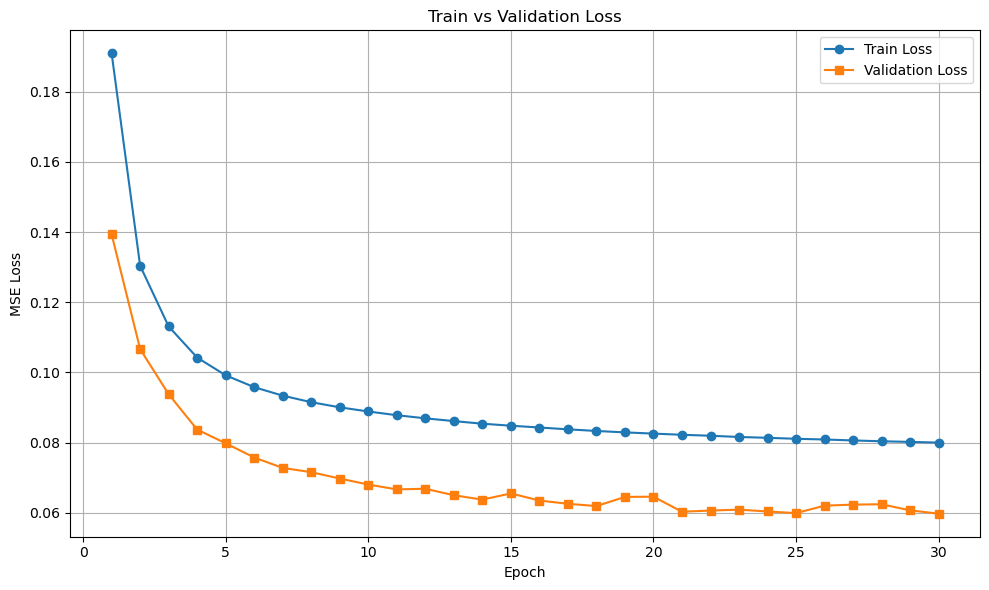

In [20]:

plt.figure(figsize=(10,6))

epochs = range(1, len(train_losses) + 1)

plt.plot(epochs, train_losses, label="Train Loss", marker='o')
plt.plot(epochs, val_losses,   label="Validation Loss", marker='s')

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Train vs Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig('Train_vs_Validation_Loss_Mercosur.png', dpi=300)
plt.tight_layout()
plt.show()


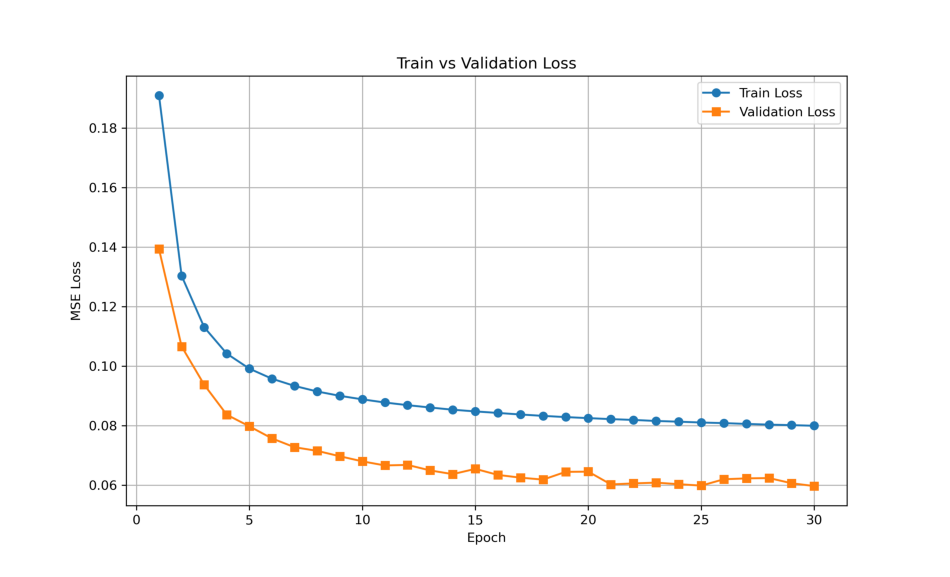

In [21]:
img = mpimg.imread("Train_vs_Validation_Loss_Mercosur.png")

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

lire les images de le training up side

In [28]:
# capteur_model.eval()
# with torch.no_grad():
#      X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

#      X_test_t = X_test_t.contiguous().to(device) # teste pra ver se da certo

#      y_pred_scaled = capteur_model(X_test_t).cpu().numpy()

capteur_model.eval()
with torch.no_grad():
    X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)

    if X_test_t.dim() == 2:     # (N, features)
        X_test_t = X_test_t.unsqueeze(1)  # vira (N, 1, features), seq_len = 1

    X_test_t = X_test_t.contiguous().to(device)
    y_pred_scaled = capteur_model(X_test_t).cpu().numpy()

y_test_real = scaler_y.inverse_transform(y_test)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)

y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_test_real = scaler_y.inverse_transform(y_test_scaled)

# # métricas globais
mae_global  = mean_absolute_error(y_test_real, y_pred_real)
rmse_global = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2_global   = r2_score(y_test_real, y_pred_real)

print("Overall metrics in the test set:")
print(f"MAE  : {mae_global:.4f}")
print(f"RMSE : {rmse_global:.4f}")
print(f"R²   : {r2_global:.4f}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 11.44 GiB. GPU 0 has a total capacity of 8.00 GiB of which 2.14 GiB is free. Of the allocated memory 4.39 GiB is allocated by PyTorch, and 385.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
metrics_per_flight = {}
unique_flights = np.unique(ids_test)

for flight in unique_flights:
     mask = (ids_test == flight)
     y_true_f = y_test_real[mask]
     y_pred_f = y_pred_real[mask]

     mae  = mean_absolute_error(y_true_f, y_pred_f)
     rmse = mean_squared_error(y_true_f, y_pred_f, squared=False)
     r2   = r2_score(y_true_f, y_pred_f)

     metrics_per_flight[flight] = {"MAE": mae, "RMSE": rmse, "R2": r2}

for flight, m in metrics_per_flight.items():
     print(f"{flight}: MAE={m['MAE']:.4f}, RMSE={m['RMSE']:.4f}, R²={m['R2']:.4f}")

mae_mean  = np.mean([m["MAE"]  for m in metrics_per_flight.values()])
rmse_mean = np.mean([m["RMSE"] for m in metrics_per_flight.values()])
r2_mean   = np.mean([m["R2"]   for m in metrics_per_flight.values()])

#

print("\nAverage metrics across all TOLs (test):")
print(f"MAE médio  : {mae_mean:.4f}")
print(f"RMSE médio : {rmse_mean:.4f}")
print(f"R² médio   : {r2_mean:.4f}")

NameError: name 'y_test_real' is not defined

In [ ]:
# df_flights = pd.DataFrame.from_dict(metrics_per_flight, orient='index')

# # adicionar as métricas globais
# df_global = pd.DataFrame({
#     "MAE":  [mae_global],
#     "RMSE": [rmse_global],
#     "R2":   [r2_global]
# }, index=["GLOBAL"])

# # concatenar tudo
# df_results = pd.concat([df_flights, df_global])



In [ ]:
# df_results.to_csv('df_results_all.csv')

In [63]:
df_results = pd.read_csv('df_results_all.csv')
df_results


,Unnamed: 0,MAE,RMSE,R2
0,TOL_1,17.552930,25.805530,0.965695
1,TOL_10,18.089918,26.275248,0.939663
2,TOL_11,18.872680,29.858081,0.931578
3,TOL_12,23.335688,35.186905,0.933199
4,TOL_13,19.306073,26.484897,0.952701
5,TOL_14,23.404106,35.351755,0.944909
6,TOL_15,25.653372,37.822956,0.944918
7,TOL_17,19.852090,28.018926,0.955206
8,TOL_18,25.425999,40.422416,0.922942
9,TOL_19,20.127155,32.340869,0.932146
